In [210]:
# import package
import numpy as np
import pandas as pd

In [211]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

In [212]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
# data.shape

# informasi tentang data
# data.info()

# deskripsi data
# data.describe()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [213]:
# drop email,address, avatar
data = data.drop(['Email', 'Address', 'Avatar'], axis=1)


In [214]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/Users/edoaurahman/development/anaconda/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


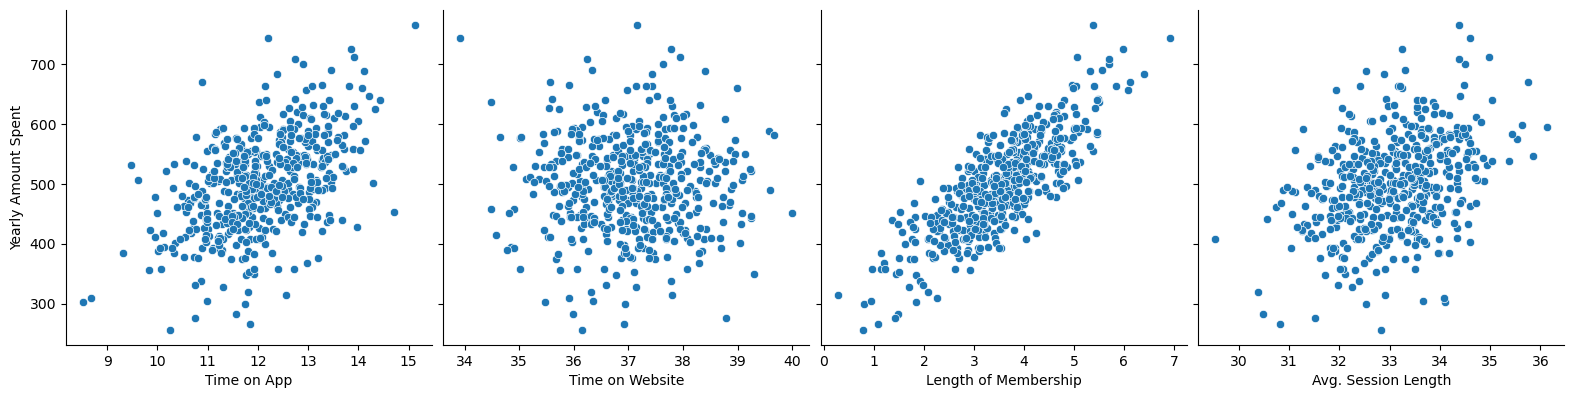

In [215]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership','Avg. Session Length'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

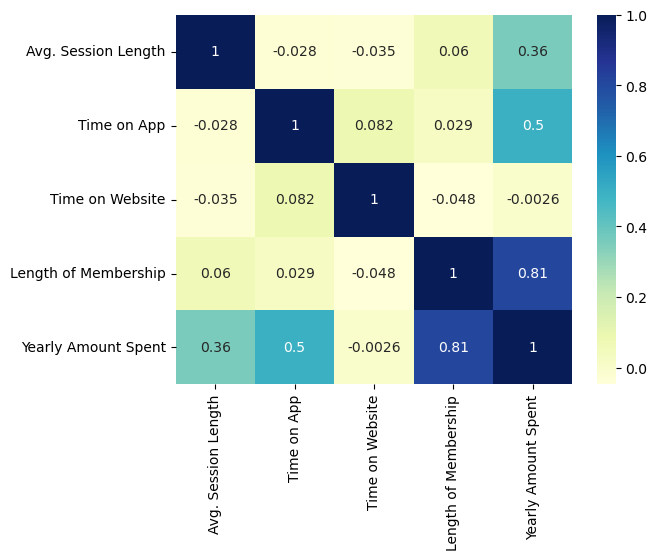

In [216]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [217]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [218]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=3)

In [219]:

# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.615
Model:                             OLS   Adj. R-squared:                  0.614
Method:                  Least Squares   F-statistic:                     556.1
Date:                 Wed, 11 Sep 2024   Prob (F-statistic):           3.90e-74
Time:                         15:57:40   Log-Likelihood:                -1852.4
No. Observations:                  350   AIC:                             3709.
Df Residuals:                      348   BIC:                             3716.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

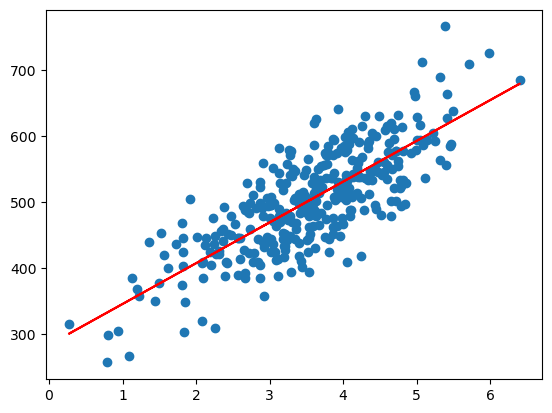

In [220]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params['const'] + lr.params['Length of Membership'] * X_train, 'r')
plt.show()

In [221]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

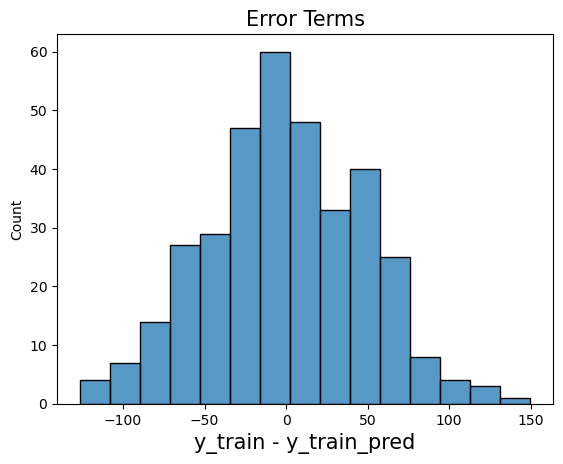

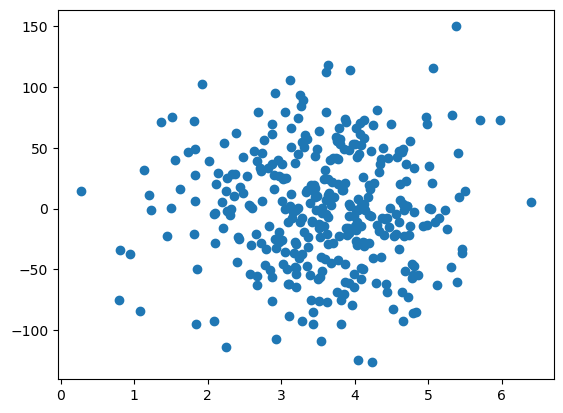

In [222]:
# Histogram residual
fig = plt.figure()
sns.histplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

In [223]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [224]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

print('R-squared:', r_squared)

R-squared: 0.7233718559945368


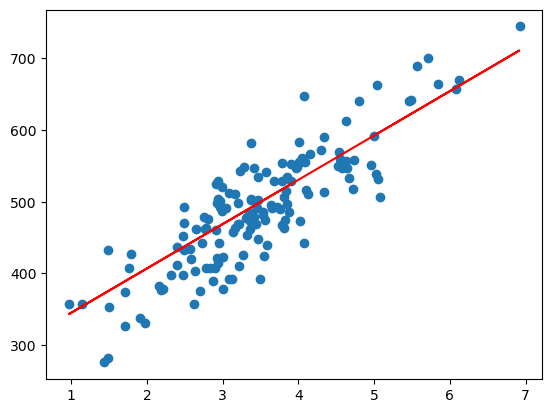

In [225]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()